In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
%matplotlib inline
import seaborn as sns

print("libraries imported successfully")

libraries imported successfully


In [2]:
datatype={'fare_amount':'float64','pickup_datetime':'object', 'pickup_longitude':'float64', 'pickup_latitude':'float64',
       'dropoff_longitude':'float64', 'dropoff_latitude':'float64', 'passenger_count':'int64'}

In [3]:
df_raw = pd.read_csv('finalDataset_raw.csv',dtype = datatype,parse_dates=['pickup_datetime'])

In [4]:
df_raw.columns

Index(['fare_amount', 'pickup_datetime', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'passenger_count'],
      dtype='object')

In [5]:
df_raw.dtypes

fare_amount                 float64
pickup_datetime      datetime64[ns]
pickup_longitude            float64
pickup_latitude             float64
dropoff_longitude           float64
dropoff_latitude            float64
passenger_count               int64
dtype: object

In [7]:
df_raw.head(5)

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,13.7,2009-01-09 07:55:13,-73.970864,40.788804,-73.983761,40.743458,1
1,10.5,2009-11-27 09:22:25,-73.975898,40.789170,-73.982707,40.755365,1
2,4.1,2009-07-20 20:32:57,-74.007454,40.710194,-74.007822,40.711429,1
3,50.0,2009-01-17 08:18:00,-73.978360,40.736050,-73.782538,40.648797,1
4,8.1,2009-01-21 20:09:00,-73.993962,40.735562,-74.007858,40.711645,1


In [6]:
df_raw.shape

(7000000, 7)

In [7]:
import datetime

def add_dateparts(df, col):
    df[col] = pd.to_datetime(df[col], format='%Y-%m-%d %H:%M:%S.%f')
    df['pickup_datetime']=pd.to_datetime(df['pickup_datetime'])-datetime.timedelta(hours=4)
    df['year'] = df[col].dt.year
    df['month'] = df[col].dt.month
    df['day'] = df[col].dt.day
    df['weekday'] = df[col].dt.weekday
    df[col + '_hour'] = df[col].dt.hour

In [8]:
add_dateparts(df_raw, 'pickup_datetime')

In [9]:
df_raw.head(5)

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,month,day,weekday,pickup_datetime_hour
0,13.7,2009-01-09 03:55:13,-73.970864,40.788804,-73.983761,40.743458,1,2009,1,9,4,3
1,10.5,2009-11-27 05:22:25,-73.975898,40.789170,-73.982707,40.755365,1,2009,11,27,4,5
2,4.1,2009-07-20 16:32:57,-74.007454,40.710194,-74.007822,40.711429,1,2009,7,20,0,16
3,50.0,2009-01-17 04:18:00,-73.978360,40.736050,-73.782538,40.648797,1,2009,1,17,5,4
4,8.1,2009-01-21 16:09:00,-73.993962,40.735562,-74.007858,40.711645,1,2009,1,21,2,16


In [10]:
df_raw.describe().applymap(lambda x: f"{x:0.5f}")

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,month,day,weekday,pickup_datetime_hour
count,7000000.00000,7000000.00000,7000000.00000,7000000.00000,7000000.00000,7000000.00000,7000000.00000,7000000.00000,7000000.00000,7000000.00000,7000000.00000
mean,11.47714,-73.97667,40.75309,-73.97558,40.75319,1.32928,2011.99935,6.05599,15.71333,2.98899,12.06351
std,43.60017,2.18422,1.80359,2.34869,2.44730,0.67644,1.99990,3.41547,8.68457,1.90882,5.82994
min,0.01000,-2319.20682,0.00114,-2771.28992,-3481.14120,1.00000,2008.00000,1.00000,1.00000,0.00000,0.00000
25%,6.00000,-73.99227,40.73655,-73.99158,40.73553,1.00000,2010.00000,3.00000,8.00000,1.00000,7.00000
50%,8.50000,-73.98209,40.75336,-73.98056,40.75385,1.00000,2012.00000,6.00000,16.00000,3.00000,12.00000
75%,12.90000,-73.96826,40.76757,-73.96520,40.76842,1.00000,2014.00000,9.00000,23.00000,5.00000,17.00000
max,93963.36000,84.29421,1963.51586,-0.00226,1963.51586,4.00000,2015.00000,12.00000,31.00000,6.00000,23.00000


In [13]:
df_raw.isnull().sum()

fare_amount             0
pickup_datetime         0
pickup_longitude        0
pickup_latitude         0
dropoff_longitude       0
dropoff_latitude        0
passenger_count         0
year                    0
month                   0
day                     0
weekday                 0
pickup_datetime_hour    0
dtype: int64

<AxesSubplot:>

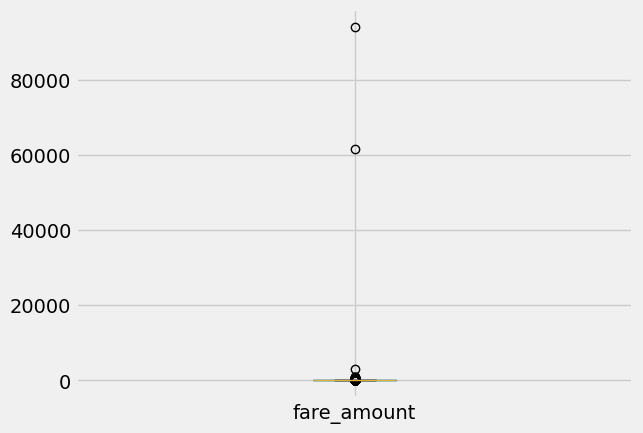

In [11]:
df_raw.boxplot(['fare_amount'])

In [12]:
max_fare_amount = 12.9 + (12.9-6)*1.5 
max_fare_amount

23.25

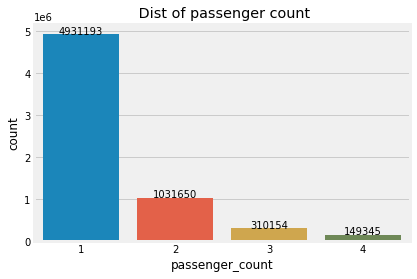

In [42]:
ax = sns.countplot(x = df_raw['passenger_count'])
plt.title(' Dist of passenger count')

for p in ax.patches:
    height = p.get_height()
    ax.text(x = p.get_x() + (p.get_width()/2),
    y = height+0.2, ha = 'center', s = '{:.0f}'.format(height))
plt.show()

Text(0.5, 1.0, ' no of pickups done on each day of the week')

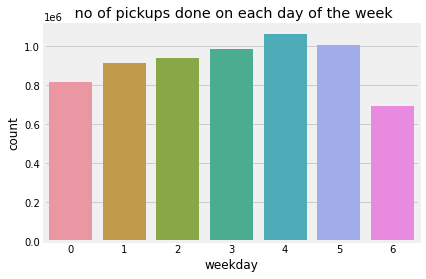

In [43]:
ax = sns.countplot(x = 'weekday', data = df_raw)
ax.set_title(' no of pickups done on each day of the week')

In [ ]:
df_raw['passenger_count'].value_counts()

1    5358954
2    1137759
3     338333
4     163340
Name: passenger_count, dtype: int64

(-74.03, -73.75)

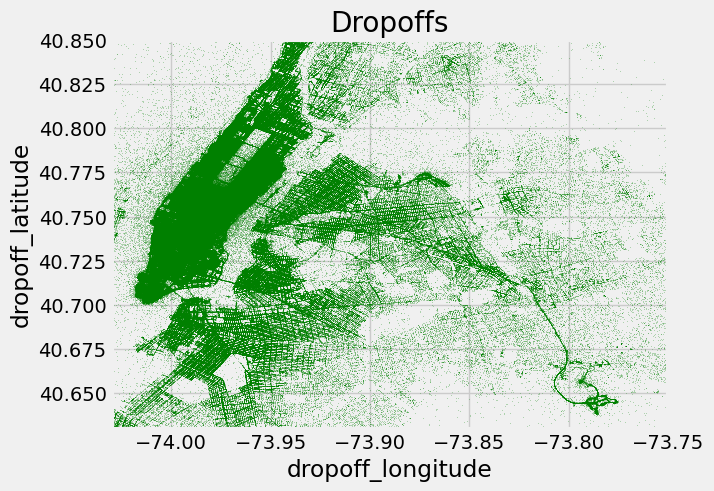

In [ ]:
#Plot Heatmap of Pickups and Dropoffs within New York 

city_long_border = (-74.03, -73.75)
city_lat_border  = (40.63, 40.85)

df_raw.plot(kind='scatter', x='dropoff_longitude', y='dropoff_latitude',
            color='green',
            s=.02, alpha=.6)

plt.title("Dropoffs")

plt.ylim(city_lat_border) 
plt.xlim(city_long_border)

(-74.03, -73.75)

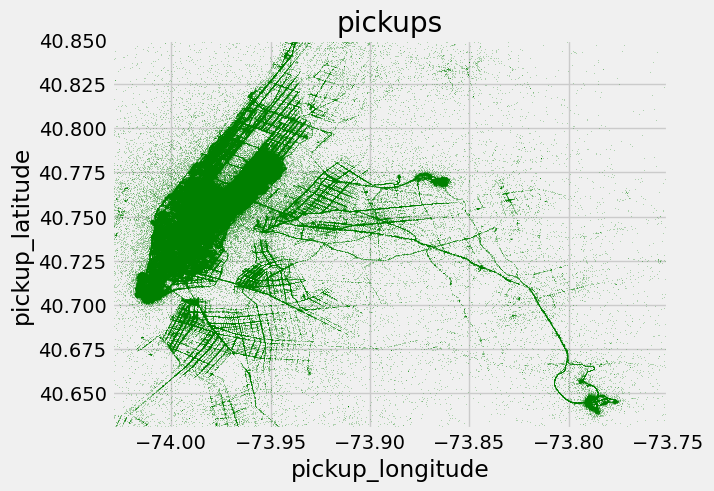

In [ ]:
df_raw.plot(kind='scatter', x='pickup_longitude', y='pickup_latitude',
            color='green',
            s=.02, alpha=.6)

plt.title("pickups")

plt.ylim(city_lat_border) 
plt.xlim(city_long_border)

In [15]:
def distance(lat1, lon1, lat2, lon2 ):
    """
    Calculate the great circle distance between two points
    on the earth (specified in decimal degrees)

    All args must be of equal length.    

    """
    lon1, lat1, lon2, lat2 = map(np.radians, [lon1, lat1, lon2, lat2])

    dlon = lon2 - lon1
    dlat = lat2 - lat1

    a = np.sin(dlat/2.0)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon/2.0)**2

    c = 2 * np.arcsin(np.sqrt(a))
    km = 6317 * c
    return km

In [16]:
df_raw['distance_km'] = distance(df_raw.pickup_latitude, df_raw.pickup_longitude,df_raw.dropoff_latitude, df_raw.dropoff_longitude)
df_raw.head(5)

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,month,day,weekday,pickup_datetime_hour,distance_km
0,13.7,2009-01-09 03:55:13,-73.970864,40.788804,-73.983761,40.743458,1,2009,1,9,4,3,5.114184
1,10.5,2009-11-27 05:22:25,-73.975898,40.789170,-73.982707,40.755365,1,2009,11,27,4,5,3.770195
2,4.1,2009-07-20 16:32:57,-74.007454,40.710194,-74.007822,40.711429,1,2009,7,20,0,16,0.139592
4,8.1,2009-01-21 16:09:00,-73.993962,40.735562,-74.007858,40.711645,1,2009,1,21,2,16,2.881222
5,5.0,2009-02-22 17:15:24,-73.973627,40.751612,-73.980555,40.741712,1,2009,2,22,6,17,1.235411


In [ ]:
import folium

Pickup_Locations = folium.Map(location= [40.767937, -73.982155 ],tiles='OpenStreetMap',zoom_start=12)

for each in df_raw[:500].iterrows():
    folium.CircleMarker([each[1]['pickup_latitude'], each[1]['pickup_longitude']],
    radius=3,
    color="blue", 
    popup = str(each[1]['pickup_latitude'])+','+str(each[1]['pickup_longitude']),
    fill_color="#FD8A6C"
    ).add_to(Pickup_Locations)

Pickup_Locations

In [ ]:
dropoff_Locations = folium.Map(location= [40.767937, -73.982155 ],tiles='OpenStreetMap',zoom_start=12)

for each in df_raw[:500].iterrows():
    folium.CircleMarker([each[1]['dropoff_latitude'], each[1]['dropoff_longitude']],
    radius=3,
    color="blue", 
    popup = str(each[1]['dropoff_latitude'])+','+str(each[1]['dropoff_longitude']),
    fill_color="#FD8A6C"
    ).add_to(dropoff_Locations)

dropoff_Locations

# Removing Invalid Data 
we can remove the rows with passenger count less than or equal to zero

new york cordinates - between -74 and 41

the taxi fare initial charge is $ 2.5, so removing fare amount less than 2.5 and greater than 23.25

In [13]:
df_raw = df_raw[((df_raw['pickup_longitude'] > -75) & (df_raw['pickup_longitude'] < -70)) &
               ((df_raw['dropoff_longitude'] > -75) & (df_raw['dropoff_longitude'] < -70)) &
               ((df_raw['pickup_latitude'] > 40) & (df_raw['pickup_latitude'] < 45)) & 
               ((df_raw['dropoff_latitude'] > 40) & (df_raw['dropoff_latitude'] < 45)) &
               (df_raw['passenger_count'] > 0) &
               ((df_raw['fare_amount'] >=2.5) & (df_raw['fare_amount'] <=23.25))]

In [14]:
df_raw.describe().applymap(lambda x: f"{x:0.5f}")

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,month,day,weekday,pickup_datetime_hour
count,6422342.00000,6422342.00000,6422342.00000,6422342.00000,6422342.00000,6422342.00000,6422342.00000,6422342.00000,6422342.00000,6422342.00000,6422342.00000
mean,9.07509,-73.97969,40.75214,-73.97795,40.75242,1.32698,2011.96188,6.04702,15.70902,2.98988,12.09894
std,4.28459,0.02960,0.03005,0.03008,0.03185,0.67541,1.99828,3.41967,8.68543,1.90468,5.81233
min,2.50000,-76.88333,37.46667,-77.83058,37.12761,1.00000,2008.00000,1.00000,1.00000,0.00000,0.00000
25%,5.80000,-73.99257,40.73726,-73.99184,40.73702,1.00000,2010.00000,3.00000,8.00000,1.00000,7.00000
50%,8.00000,-73.98244,40.75330,-73.98125,40.75397,1.00000,2012.00000,6.00000,16.00000,3.00000,13.00000
75%,11.30000,-73.97014,40.76696,-73.96775,40.76801,1.00000,2014.00000,9.00000,23.00000,5.00000,17.00000
max,23.25000,-70.18411,44.89465,-70.05050,44.51093,4.00000,2015.00000,12.00000,31.00000,6.00000,23.00000


In [17]:
df_final = df_raw.copy()
df_final.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,month,day,weekday,pickup_datetime_hour,distance_km
0,13.7,2009-01-09 03:55:13,-73.970864,40.788804,-73.983761,40.743458,1,2009,1,9,4,3,5.114184
1,10.5,2009-11-27 05:22:25,-73.975898,40.789170,-73.982707,40.755365,1,2009,11,27,4,5,3.770195
2,4.1,2009-07-20 16:32:57,-74.007454,40.710194,-74.007822,40.711429,1,2009,7,20,0,16,0.139592
4,8.1,2009-01-21 16:09:00,-73.993962,40.735562,-74.007858,40.711645,1,2009,1,21,2,16,2.881222
5,5.0,2009-02-22 17:15:24,-73.973627,40.751612,-73.980555,40.741712,1,2009,2,22,6,17,1.235411


In [ ]:
df_final.corr()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,month,day,weekday,pickup_datetime_hour,distance_km
fare_amount,1.000000,0.080057,-0.039722,0.059824,-0.032449,0.004641,0.027288,0.002797,0.000729,0.000301,-0.002159,0.167923
pickup_longitude,0.080057,1.000000,0.120904,0.412196,0.144778,-0.005180,0.003885,0.006501,0.000731,-0.013158,-0.041912,0.321890
pickup_latitude,-0.039722,0.120904,1.000000,0.154464,0.476522,-0.015707,-0.014707,0.001006,-0.001594,-0.025311,-0.083946,-0.183164
dropoff_longitude,0.059824,0.412196,0.154464,1.000000,0.220670,-0.006805,0.001095,0.005321,0.000994,-0.000754,-0.012913,0.261190
dropoff_latitude,-0.032449,0.144778,0.476522,0.220670,1.000000,-0.008529,-0.008108,0.000963,-0.000206,-0.020093,-0.051233,-0.155976
passenger_count,0.004641,-0.005180,-0.015707,-0.006805,-0.008529,1.000000,-0.023329,0.012972,0.005302,0.063461,0.082816,0.015386
year,0.027288,0.003885,-0.014707,0.001095,-0.008108,-0.023329,1.000000,-0.196194,-0.008174,0.009887,-0.003703,0.013383
month,0.002797,0.006501,0.001006,0.005321,0.000963,0.012972,-0.196194,1.000000,-0.014061,-0.013187,0.006063,0.005472
day,0.000729,0.000731,-0.001594,0.000994,-0.000206,0.005302,-0.008174,-0.014061,1.000000,0.008179,0.005972,0.000625
weekday,0.000301,-0.013158,-0.025311,-0.000754,-0.020093,0.063461,0.009887,-0.013187,0.008179,1.000000,0.081233,0.012782


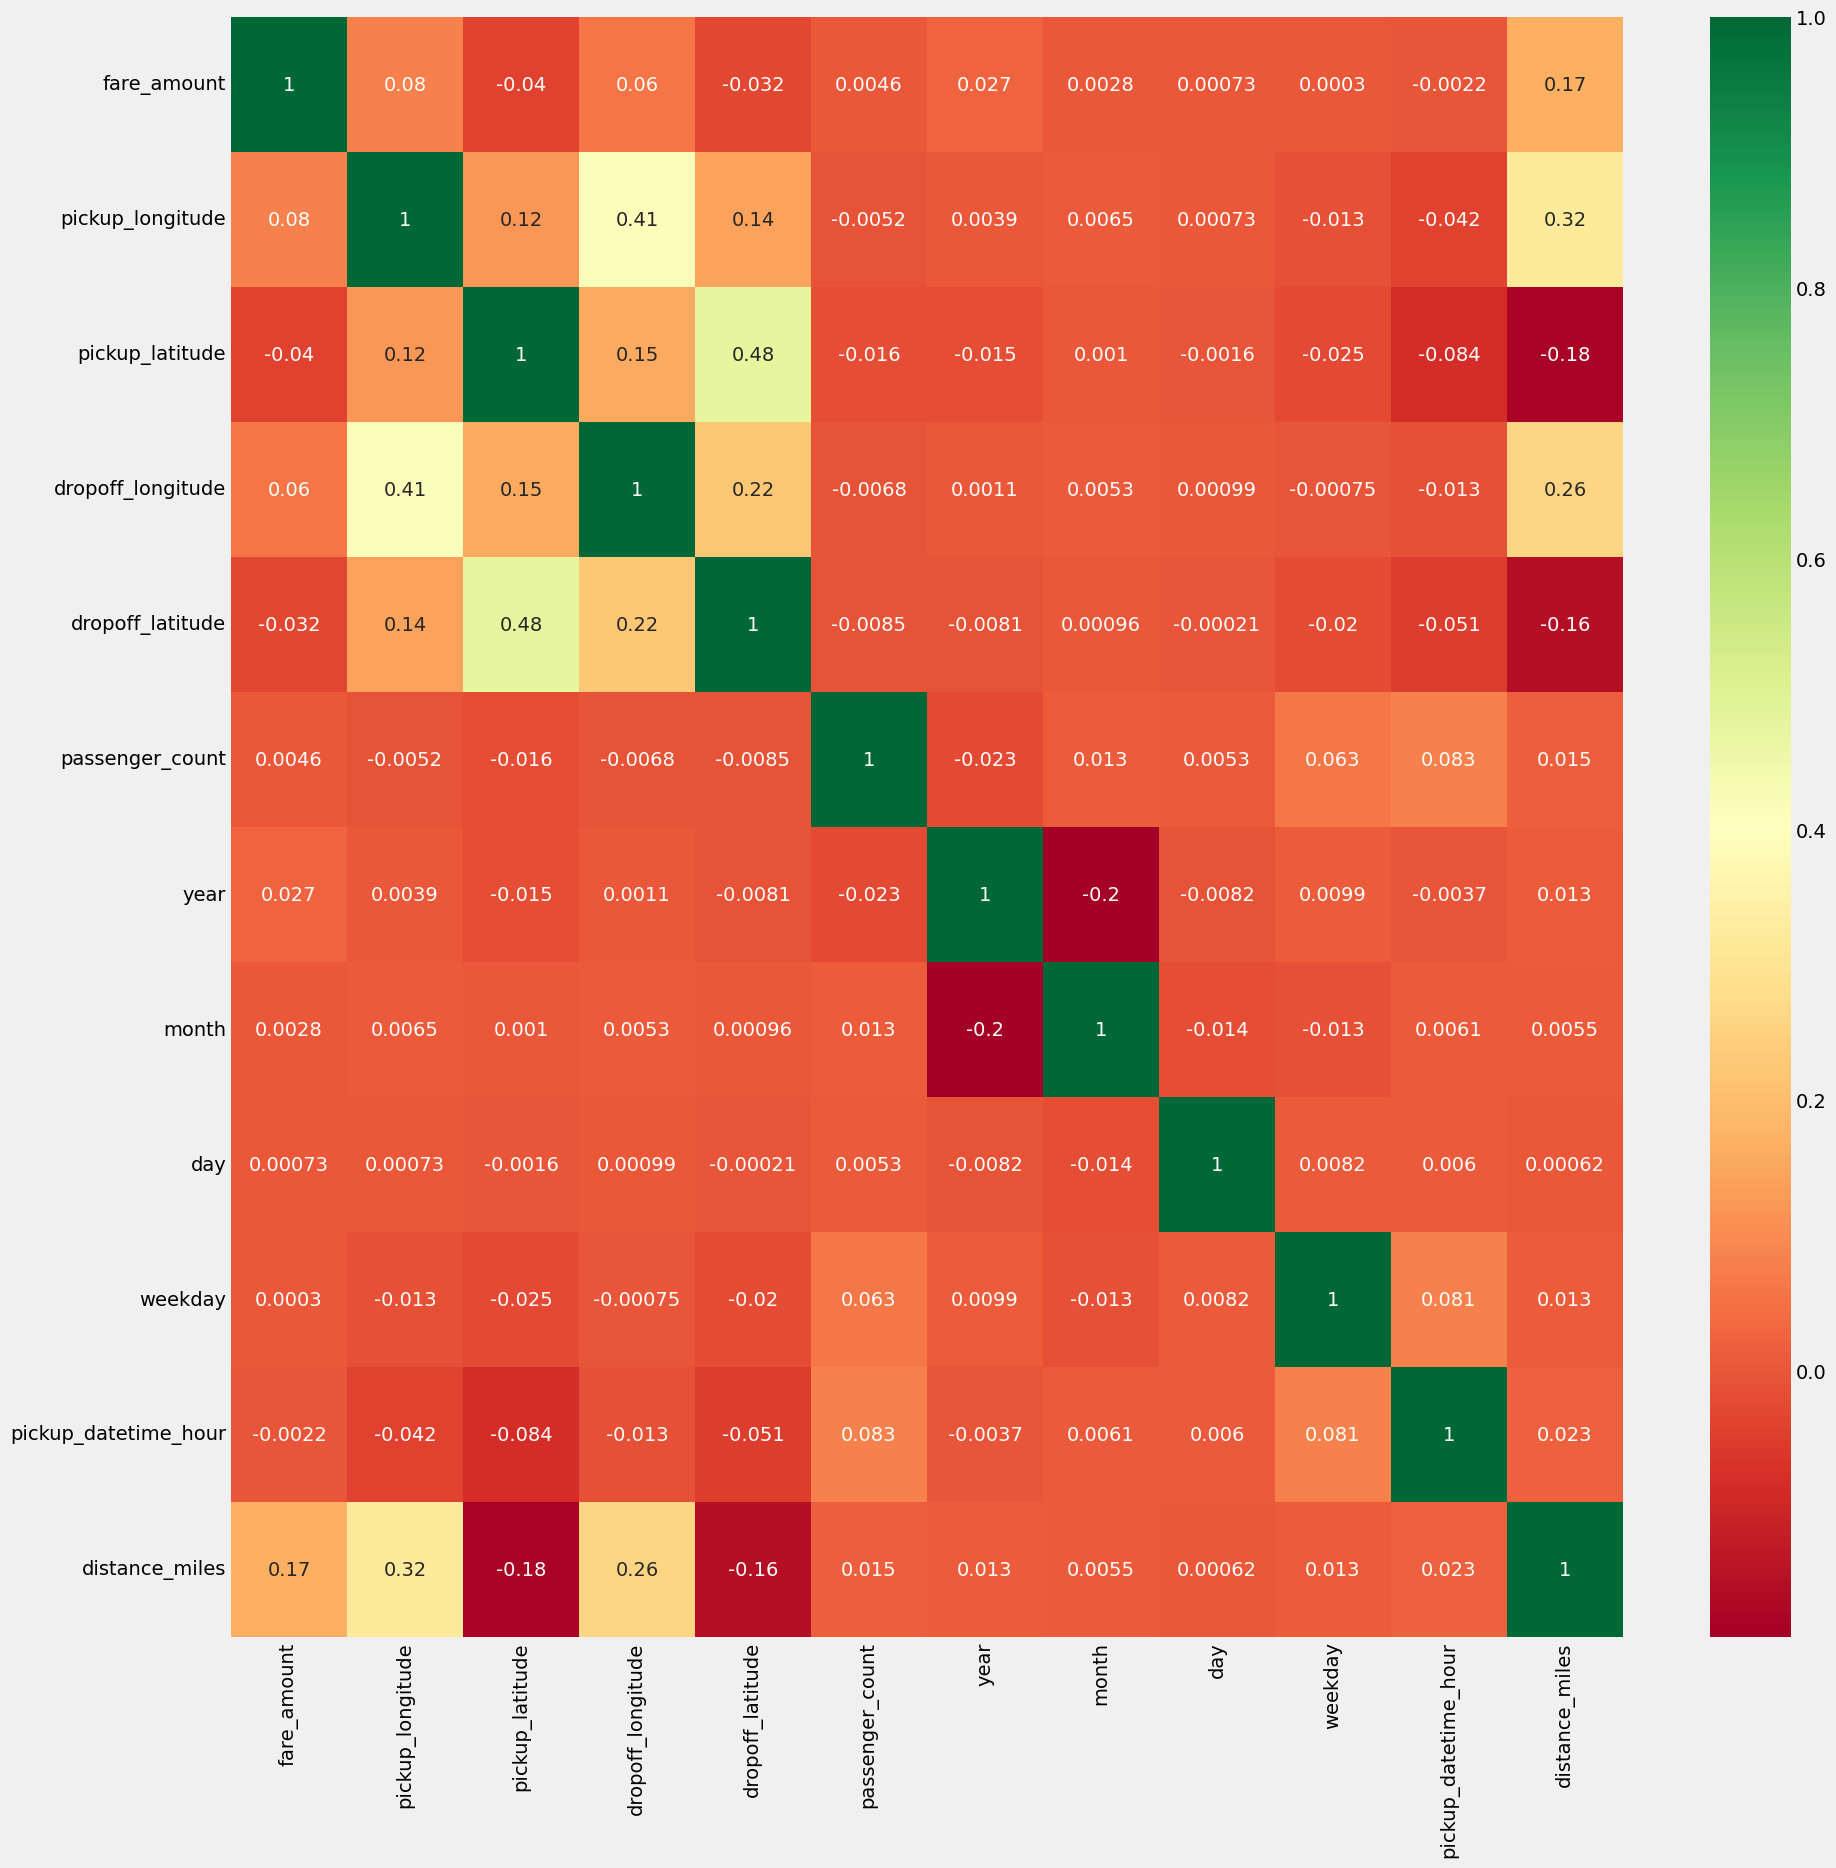

In [ ]:
corrmat = df_final.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(df_final[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [18]:
df_final.isnull().sum()

fare_amount             0
pickup_datetime         0
pickup_longitude        0
pickup_latitude         0
dropoff_longitude       0
dropoff_latitude        0
passenger_count         0
year                    0
month                   0
day                     0
weekday                 0
pickup_datetime_hour    0
distance_km             0
dtype: int64

In [19]:
df_final.shape

(6422342, 13)

In [21]:
df_final.to_csv('EDA_data.csv', index = True)